###Question 10

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import scipy.optimize

####a) Newton method

In [0]:
def f(point):
  x, y = point.T
  return 100*(y - x**2)**2 + (1 - x)**2

def df(point):
  x, y = point.T
  return np.array([2*(200*x**3 - 200*x*y + x - 1), 200*(y - x**2)])

def df2(point):
  x, y = point.T
  return np.array([[1200*x**2 - 400*y + 2, -200*x], [-200*x, 200]])

In [0]:
def plot_function(func, N=100, lims=(-1, 10.5), figsize=(8, 8)):
    xlist = np.linspace(*lims, N+1)
    ylist = np.linspace(*lims, N+1)
    x, y = np.meshgrid(xlist, ylist)
    plt.figure(figsize=figsize)
    xy = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))
    f1 = func(xy).reshape(N+1, N+1)
    plt.contourf(x, y, f1)
    plt.title(r'$f = x^2 + xy + 10y^2 - 22y - 5x$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)

In [0]:
def newton(f, df, df2, x0, iters=1000, eps=1e-2, plot=False):
    if plot: plot_function(f, lims=(-2, 5))

    u = np.empty((iters, len(x0)))
    df_t = np.empty((iters-1, len(x0)))
    df2_t = np.empty((iters-1, len(x0), len(x0)))
    u[0] = x0

    for t in range(1, iters):
        df_t[t-1] = df(u[t-1])
        df2_t[t-1] = df2(u[t-1])
        if np.linalg.norm(df_t[t-1]) < eps:  break

        u[t] = u[t-1] - pinv(df2_t[t-1])@df_t[t-1]

    print ('Starting point: x0={}'.format(x0))
    print ('Eps: {}\n'.format(eps))

    if plot:
      scale = 5
      plt.plot(u[:t, 0], u[:t, 1], "ro")
      for tt in range(t):
          plt.arrow(*u[tt], *(-pinv(df2_t[tt])@df_t[tt]/scale), head_width=0.03, ec="r", fc="r")

    print ('Appr.min: {} at x*={}'.format(f(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    return u[t-1], f(u[t-1]), t

Starting point: x0=[0, 0]
Eps: 0.01

Appr.min: 8.073105462476392e-05 at x*=[0.99101781 0.98209365]
Found after 999 iterations


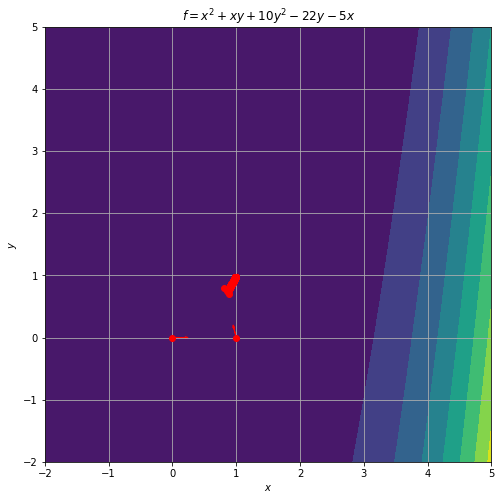

In [5]:
newton(f, df, df2, [0, 0], 1000, plot=True);

####b) BFGS quasi-Newton method



In [0]:
def backtracking_line_search(f, df, xk, pk):
    alpha, koeff, c = 2, 2, 0.1
    # Wolfe conditions (sufficient decrease and curvative) 
    while not (f(xk) + (1 - c)*alpha*df(xk)@pk <= f(xk + alpha*pk) and f(xk + alpha*pk) <= f(xk) + c*alpha*df(xk)@pk):
      alpha /= koeff
    return alpha

In [0]:
def bfgs(f, df, x0, iters=1000, eps=10e-3, plot=False):
    if plot:  plot_function(f, lims=(-0.5, 1.5))

    u = np.empty((iters, len(x0)))
    pk = np.empty((iters-1, len(x0)))
    alpha_k = np.empty((iters-1, len(x0)))
    df_t = np.empty((iters-1, len(x0)))
    u[0] = x0

    gfk = df(u[0])
    I = np.eye(len(u[0]), dtype=int)
    Hk = I
   
    for t in range(1, iters):
        pk[t-1] = -np.dot(Hk, gfk)

        #line_search = scipy.optimize.line_search(f, df, u[t-1], pk[t-1])
        #alpha_k[t-1] = line_search[0]

        line_search = backtracking_line_search(f, df, u[t-1], pk[t-1])
        alpha_k[t-1] = line_search
        
        xkp1 = u[t-1] + alpha_k[t-1] * pk[t-1]
        sk = xkp1 - u[t-1]
        u[t] = xkp1
        
        gfkp1 = df(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1

        if np.linalg.norm(gfk) < eps and gfk.T@u[t-1] > 0:  break
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] * sk[np.newaxis, :])

    print ('Starting point: x0={}'.format(x0))
    print ('Eps: {}\n'.format(eps))

    if plot:
      scale = 5
      plt.plot(u[:t, 0], u[:t, 1], "ro")
      for tt in range(t):
          plt.arrow(*u[tt], *(alpha_k[tt]*pk[tt]/scale), head_width=0.03, ec="r", fc="r")

    print ('Appr.min: {} at x*={}'.format(f(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    return (u[t-1], t)

Starting point: x0=[0, 0]
Eps: 0.01

Appr.min: 2.0194103254492851e-07 at x*=[0.99960584 0.99923342]
Found after 19 iterations


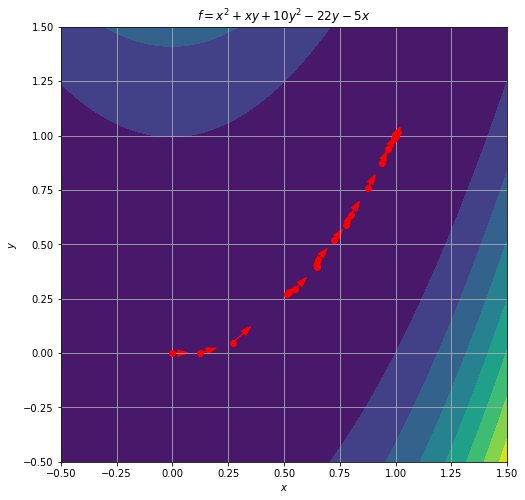

In [8]:
bfgs(f, df, [0, 0], 1000, plot=True);

###Question 11

####n = 2:

In [0]:
n = 2

In [0]:
a = np.vstack((np.random.rand(n+1, n), np.ones(n), -np.eye(n)))
b = np.r_[np.random.rand(n+1)+1, [1], np.zeros(n)][:, None]
c = np.random.rand(n, 1)

In [12]:
a, b, c

(array([[ 0.10855882,  0.56233531],
        [ 0.77032296,  0.51086641],
        [ 0.20094523,  0.22361643],
        [ 1.        ,  1.        ],
        [-1.        , -0.        ],
        [-0.        , -1.        ]]), array([[1.74195451],
        [1.88194891],
        [1.16845301],
        [1.        ],
        [0.        ],
        [0.        ]]), array([[0.98529428],
        [0.82764358]]))

In [0]:
def f_n(x):
  d = b - a@x
  # print(d)
  dflag = d > 0
  d[dflag] = np.log(d[dflag])
  d[~dflag] = -1e9
  # print(d)
  return c.T@x - np.sum(d)

In [0]:
def df_n(x):
  d = b - a@x.T
  d = a / d
  return c.T + np.sum(d, axis=0)

In [0]:
def df2_n(x):
  d = b - a@x.T
  d = a / d
  return d.T@d

In [0]:
def plot_function2(func, N=10, lims=(1e-3, 10), figsize=(8, 8), constaraints=None):
    xlist = np.linspace(*lims, N+1)
    ylist = np.linspace(*lims, N+1)
    x, y = np.meshgrid(xlist, ylist)
    plt.figure(figsize=figsize)
    xy = np.vstack((x.reshape(-1), y.reshape(-1)))
    f1 = func(xy).reshape(N+1, N+1)
    plt.contourf(x, y, f1)
    if constaraints is not None:
      for i, (ai, bi) in enumerate(zip(*constaraints)):
        yy = (bi - ai[0] * xlist) / ai[1]
        plt.plot(xlist, yy, "--", lw=2, label=str(i))

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)
    plt.xlim(*lims)
    plt.ylim(*lims)
    plt.legend()

def newton11(f, df, df2, x0, iters=1000, eps=1e-2, plot=False, constaraints=None):
    if plot: plot_function2(f, lims=(1e-2, 5), constaraints=constaraints)

    x_size = x0.size
    u = np.empty((iters, x_size))
    df_t = np.empty((iters-1, x_size))
    df2_t = np.empty((iters-1, x_size, x_size))
    u[0] = x0

    for t in range(1, iters):
        df_t[t-1] = df(u[t-1][None])
        df2_t[t-1] = df2(u[t-1][None])
        if np.linalg.norm(df_t[t-1]) < eps:  break

        u[t] = u[t-1] - pinv(df2_t[t-1])@df_t[t-1]

    print ('Starting point: x0={}'.format(x0))
    print ('Eps: {}\n'.format(eps))

    if plot:
      scale = 5
      plt.plot(u[:t, 0], u[:t, 1], "ro")
      for tt in range(t):
          plt.arrow(*u[tt], *(-pinv(df2_t[tt])@df_t[tt]/scale), head_width=0.03, ec="r", fc="r")

    print ('Appr.min: {} at x*={}'.format(f(u[t-1]), u[t-1]))
    print ('Found after {} iterations'.format(t))
    return u[t-1], f(u[t-1]), t

####Newton:

Starting point: x0=[1.  1.5]
Eps: 0.01

Appr.min: [1.2e+10] at x*=[0.87113595 0.9347451 ]
Found after 4 iterations


(array([0.87113595, 0.9347451 ]), array([1.2e+10]), 4)

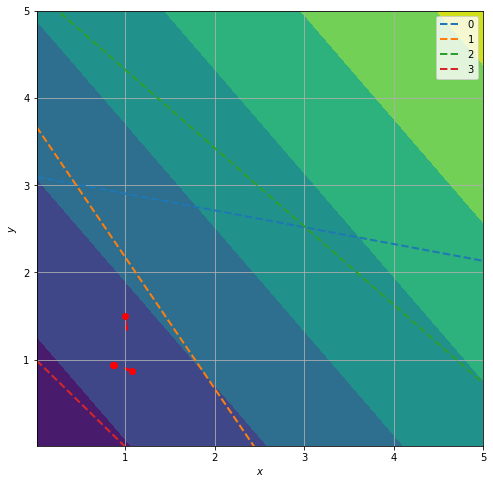

In [25]:
newton11(f_n, df_n, df2_n, np.array([1, 1.5]), 1000, plot=True, constaraints=(a[:n+2], b[:n+2]))

In [0]:
#bfgs(f_n, df_n, np.array([1, 1.5]), 1000, plot=False);

####n = 10:

In [0]:
n = 10

In [0]:
a = np.vstack((np.random.rand(n+1, n), np.ones(n), -np.eye(n)))
b = np.r_[np.random.rand(n+1)+1, [1], np.zeros(n)][:, None]
c = np.random.rand(n, 1)

####Newton:

In [32]:
newton11(f_n, df_n, df2_n, np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1000, plot=False, constaraints=(a[:n+2], b[:n+2]))

Starting point: x0=[1 1 1 1 1 1 1 1 1 1]
Eps: 0.01

Appr.min: [2.64e+11] at x*=[  1.79737385   2.34587065 647.99507812   2.27720384   6.96703881
   1.75221877   4.76743643   2.17152314   1.9508799    2.14098181]
Found after 10 iterations


(array([  1.79737385,   2.34587065, 647.99507812,   2.27720384,
          6.96703881,   1.75221877,   4.76743643,   2.17152314,
          1.9508799 ,   2.14098181]), array([2.64e+11]), 10)